In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sympy
from sympy import exp, Symbol, pi

from random import sample

from math import factorial, cos

In [86]:
def f(t):
    return exp(-t**2)

In [121]:
# вычисление значения базисного полинома Лагранжа в заданной точке x
def l(i, x, x_nodes):

    res = 1

    x_i = x_nodes[i]

    for j, x_j in enumerate(x_nodes):
        if i != j:
            res *= (x - x_j) / (x_i - x_j)

    return res


In [120]:
# вычисление значения интерполяционного полинома Лагранжа в заданной точке x
def L(x, x_nodes, y_nodes):

    res = 0

    for i, y_i in enumerate(y_nodes):
        res += y_i * l(i, x, x_nodes)

    return res

In [89]:
a = -5
b = 5

# 3

Для демонстрации работы функции интерполяции возьмем данные об изменении курса доллара США (USD) с официального сайта ЦБ РФ в период с 01.01.2024 по 01.01.2025.

Данные представлены в следующей таблице:


In [90]:
data_usd = pd.read_excel('RC_F01_01_2024_T01_01_2025.xlsx')
data_usd

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,nominal,data,curs,cdx
0,1,2024-12-29,101.6797,Доллар США
1,1,2024-12-28,100.5281,Доллар США
2,1,2024-12-27,99.2295,Доллар США
3,1,2024-12-26,99.6125,Доллар США
4,1,2024-12-25,99.8729,Доллар США
...,...,...,...,...
243,1,2024-01-16,87.6772,Доллар США
244,1,2024-01-13,88.1324,Доллар США
245,1,2024-01-12,88.7818,Доллар США
246,1,2024-01-11,89.3939,Доллар США


In [91]:
data_usd['day_number'] = [int(data.strftime('%j')) for data in data_usd['data']]
data_usd

,nominal,data,curs,cdx,day_number
0,1,2024-12-29,101.6797,Доллар США,364
1,1,2024-12-28,100.5281,Доллар США,363
2,1,2024-12-27,99.2295,Доллар США,362
3,1,2024-12-26,99.6125,Доллар США,361
4,1,2024-12-25,99.8729,Доллар США,360
...,...,...,...,...,...
243,1,2024-01-16,87.6772,Доллар США,16
244,1,2024-01-13,88.1324,Доллар США,13
245,1,2024-01-12,88.7818,Доллар США,12
246,1,2024-01-11,89.3939,Доллар США,11


В качестве абсцисс интерполяционных узлов возьмем порядковый номер в году дня, за который приведен курс, в качестве ординат - сам курс

Выберем от 5 до 10 произвольных значений курса доллара и построим график работы функции.

Возьмем 8 индексов строк датафрейма для выбора значений.

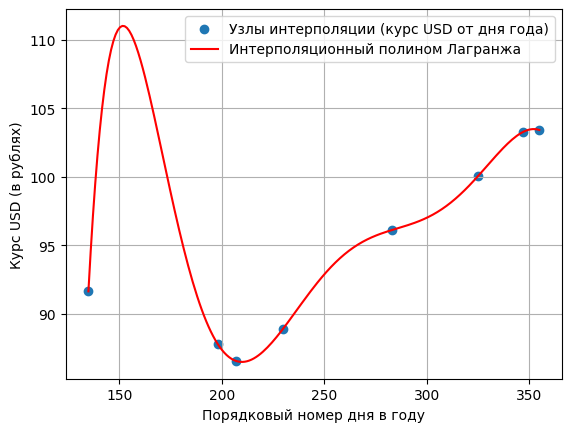

In [108]:
samp_list = sample([i for i in range(248)], 8)
selected_usd = data_usd.loc[samp_list]

x_nodes = [data for data in selected_usd['day_number']]
y_nodes = [data for data in selected_usd['curs']]

x_lagrange = np.linspace(min(x_nodes), max(x_nodes), 200)
y_lagrange = [L(x, x_nodes, y_nodes) for x in x_lagrange]

plt.scatter(x_nodes, y_nodes, label='Узлы интерполяции (курс USD от дня года)')
plt.plot(x_lagrange, y_lagrange, label='Интерполяционный полином Лагранжа', color='red')

# Настройка графика
# plt.title('Интерполяция полиномом Лагранжа')
plt.xlabel('Порядковый номер дня в году')
plt.ylabel('Курс USD (в рублях)')
plt.legend()
plt.grid(True)
plt.show()

# 4 (равномерное распределение)

# 4.а

Равномерно выберем некоторое (разное) кол-во узлов на интервале [-5;5] и построим графики интерполяции для функции f(t).

Возьмем 5 значений n, выбрав их рандомно на интервале от 5 до 30.

In [100]:
n_list = sorted(sample(range(5, 30), 5))

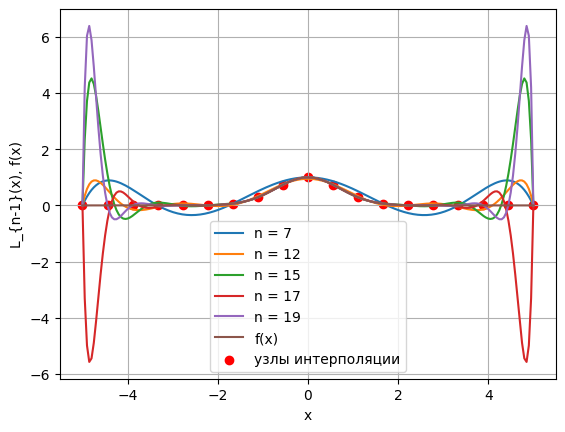

In [109]:
x_values = np.linspace(a, b, 200)
y_f_values = [f(x) for x in x_values]

for n in n_list:
    x_nodes = np.linspace(a, b, n)
    y_nodes = [f(x) for x in x_nodes]
    y_lagrange_values = [L(x, x_nodes, y_nodes) for x in x_values]

    plt.plot(x_values, y_lagrange_values, label=f'n = {n}')    #график интерполяции лагранжа


plt.plot(x_values, y_f_values, label='f(x)')                    #график функции в выбранных точках
plt.scatter(x_nodes, y_nodes, color='red', label="узлы интерполяции")                       # Отображение узлов интерполяции
plt.xlabel('x')
plt.ylabel('L_{n-1}(x), f(x)')
plt.legend()
plt.grid(True)
# plt.title('Интерполяционный полином Лагранжа при разных кол-вах узлов интерполяции')
plt.show()

# 4.б

In [63]:
def leb_distance(x_nodes):
    y_nodes = [f(x) for x in x_nodes]

    x_lagrange = np.linspace(a, b, 400)
    y_lagrange = [L(x, x_nodes, y_nodes) for x in x_lagrange]

    delta = [abs(f(x_lagrange[i]) - y_lagrange[i]) for i in range(len(x_lagrange))]

    return max(delta)

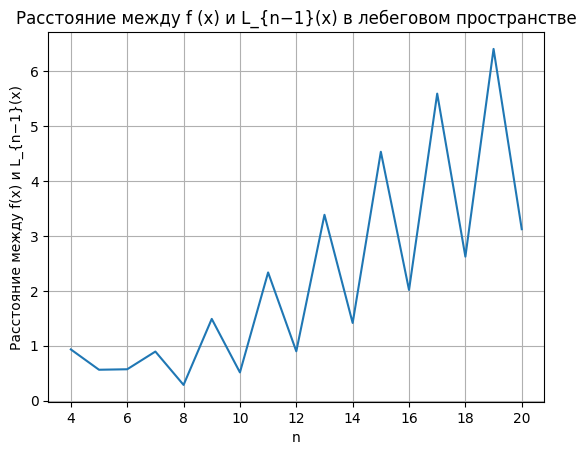

In [105]:
n_range = range(4,21)
distances = []
for n in n_range:
    x_nodes = np.linspace(a, b, n)
    distances.append(leb_distance(x_nodes))

plt.plot(n_range, distances)
plt.xlabel('n')
plt.ylabel('Расстояние между f(x) и L_{n−1}(x)')
plt.grid(True)
plt.title('Расстояние между f (x) и L_{n−1}(x) в лебеговом пространстве')
plt.show()


# 4.в

In [65]:
# находим максимальную n-ую производную на отрезке
def max_derivative(f, x, a, b, n, N=2000):

    # вычисляем n-ую производную
    f_n = sympy.diff(f, x, n)
    f_n_func = sympy.lambdify(x, f_n, 'numpy')

    # вычисляем значения производной в N точках отрезка
    x_values = np.linspace(a, b, N)
    y_values = f_n_func(x_values)

    return np.max(np.abs(y_values))

In [66]:
# находим максимальное значение полинома узлов на отрезке
def max_poly_node(a, b, x_nodes, N = 5000):

    x_values = np.linspace(a,b,N) # точки для поиска максимума

    # ищем значение полинома в точке x
    def poly(x, x_nodes):
        res = 1
        for xi in x_nodes:
            res *= (x - xi)
        return res

    poly_values = [poly(x, x_nodes) for x in x_values]

    return max(poly_values)

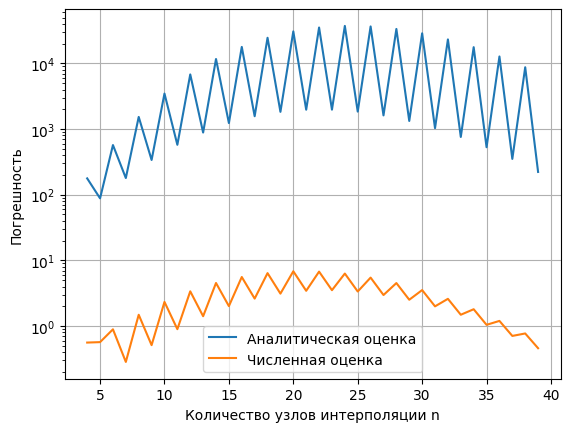

In [110]:
analytic_errors = []
numeric_errors = []

n_range = range(4,40)

for n in n_range:
    # узлы интерполяции
    x_nodes = np.linspace(a, b, n+1)

    t = sympy.symbols('t')
    M_n = max_derivative(sympy.exp(-t**2), t, a, b, n)

    P_n = max_poly_node(a, b, x_nodes)

    analytic_errors.append((M_n/factorial(n)) * P_n)
    numeric_errors.append(leb_distance(x_nodes))

plt.semilogy(n_range, analytic_errors, label='Аналитическая оценка')
plt.semilogy(n_range, numeric_errors, label='Численная оценка')
plt.xlabel('Количество узлов интерполяции n')
plt.ylabel('Погрешность')
plt.legend()
plt.grid(True)
plt.show()

# 5 (4 для оптимального распределения)

In [68]:
# Генерация узлов Чебышёва
def chebyshev_nodes(a, b, n):
    nodes = []
    for i in range(n):
        nodes.append(0.5 * (a + b) + 0.5 * (b - a) * cos((2 * i + 1) * pi / (2 * n)))
    return nodes

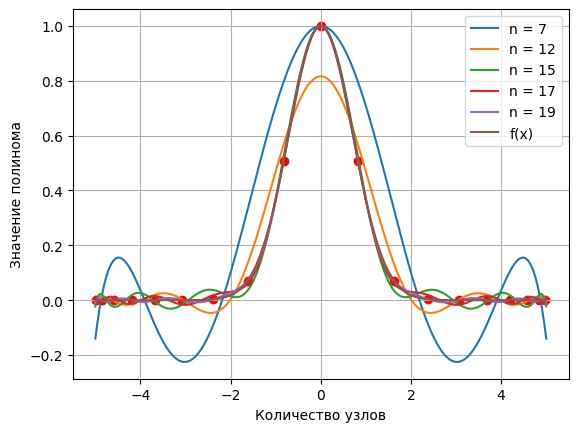

In [111]:
x_values = np.linspace(a, b, 200)
y_f_values = [f(x) for x in x_values]

for n in n_list:
    x_nodes = chebyshev_nodes(a, b, n)                         # чебышевы узлы
    y_nodes = [f(x) for x in x_nodes]
    y_lagrange_values = [L(x, x_nodes, y_nodes) for x in x_values]

    plt.plot(x_values, y_lagrange_values, label=f'n = {n}')


plt.plot(x_values, y_f_values, label='f(x)')
plt.scatter(x_nodes, y_nodes, color='red')
plt.xlabel('Количество узлов')
plt.ylabel('Значение полинома')
plt.legend()
plt.grid(True)
# plt.title('Интерполяционный полином Лагранжа с оптимальным распределением узлов')
plt.show()

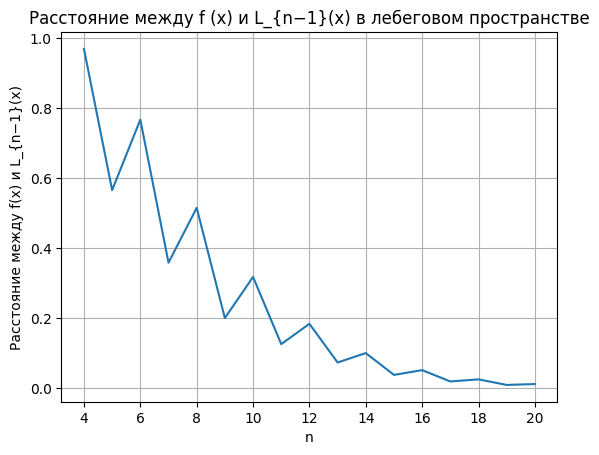

In [112]:
n_range = range(4,21)
distances = []
for n in n_range:
    x_nodes = chebyshev_nodes(a, b, n)
    distances.append(leb_distance(x_nodes))

plt.plot(n_range, distances)
plt.xlabel('n')
plt.ylabel('Расстояние между f(x) и L_{n−1}(x)')
plt.grid(True)
plt.title('Расстояние между f (x) и L_{n−1}(x) в лебеговом пространстве')
plt.show()

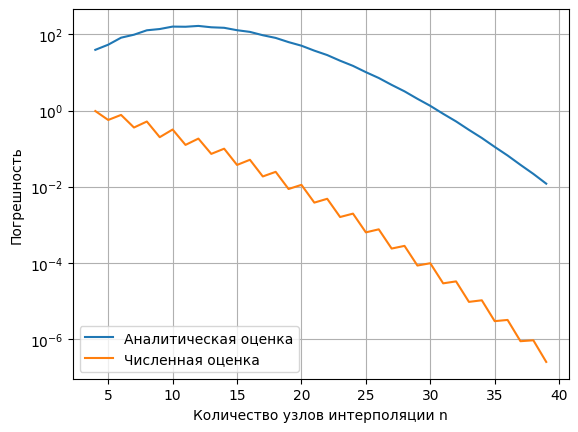

In [113]:
analytic_errors_cheb = []
numeric_errors_cheb = []

n_range = range(4,40)

for n in n_range:
    # узлы интерполяции
    x_nodes = chebyshev_nodes(-5, 5, n)

    t = sympy.symbols('t')
    M_n = max_derivative(sympy.exp(-t**2), t, a, b, n)

    P_n = max_poly_node(a, b, x_nodes)

    analytic_errors_cheb.append((M_n/factorial(n)) * P_n)
    numeric_errors_cheb.append(leb_distance(x_nodes))

plt.semilogy(n_range, analytic_errors_cheb, label='Аналитическая оценка')
plt.semilogy(n_range, numeric_errors_cheb, label='Численная оценка')
plt.xlabel('Количество узлов интерполяции n')
plt.ylabel('Погрешность')
plt.legend()
plt.grid(True)
plt.show()

# 6

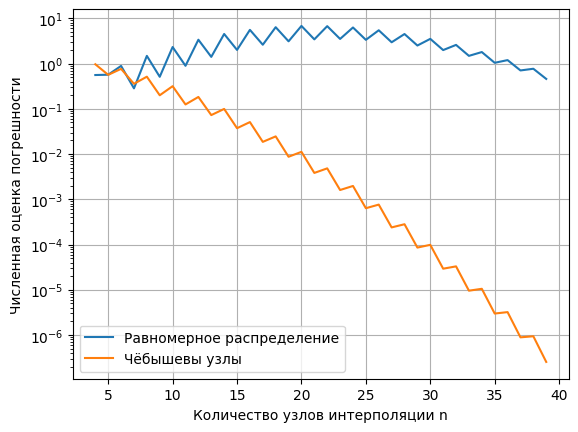

In [114]:
plt.semilogy(n_range, numeric_errors, label='Равномерное распределение')
plt.semilogy(n_range, numeric_errors_cheb, label='Чёбышевы узлы')
# plt.title('Сравнение влияния распределения узлов на погрешность оценки')
plt.xlabel('Количество узлов интерполяции n')
plt.ylabel('Численная оценка погрешности')
plt.legend()
plt.grid(True)
plt.show()


**Как влияет расположение узлов на погрешность аппроксимации?**

Оптимальное расположение узлов уменьшает погрешность аппроксимации на несколько порядков.


**Какое расположение узлов и для каких n даёт более точную интерполяцию?**

Оптимальное расположение узлов в общем случае дает более точную интерполяцию, однако в случае небольших n (примерно до 7) погрешности в случае оптимально расположенных узлов и в случае равномерно расположенных узлов дает примерно одинаковую погрешность. При увеличении n в случае равномерного расположения узлов вознкиает эффект Рунге и погрешность стремительно растет.


**Как влияет использование локальной или глобальной интерполяции на точность интерполяции?**

Локальная интерполяция обеспечивает более стабильную точность, особенно для большого числа узлов. На каждом подотрезке можно использовать полиномы низкой степени, что уменьшает осцилляции и улучшает точность.

# 5(4 для кусочно-линейной)

In [125]:
# Кусочно-линейная интерполяция
def piecewise_linear_interpolation(x, x_nodes, y_nodes):
    n = len(x_nodes)
    for i in range(n-1):
        if x_nodes[i] <= x <= x_nodes[i+1]:
            return y_nodes[i] + (y_nodes[i+1] - y_nodes[i]) / (x_nodes[i+1] - x_nodes[i]) * (x - x_nodes[i])
    return 0

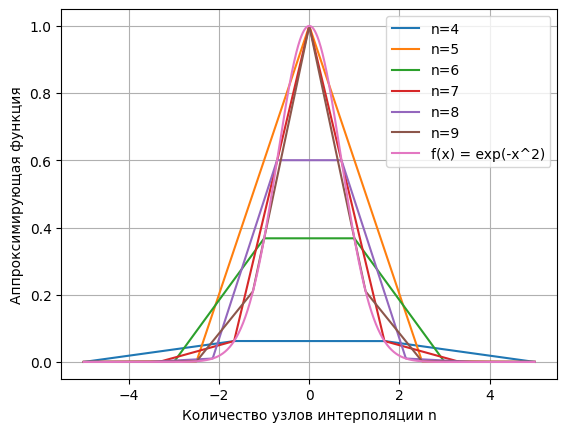

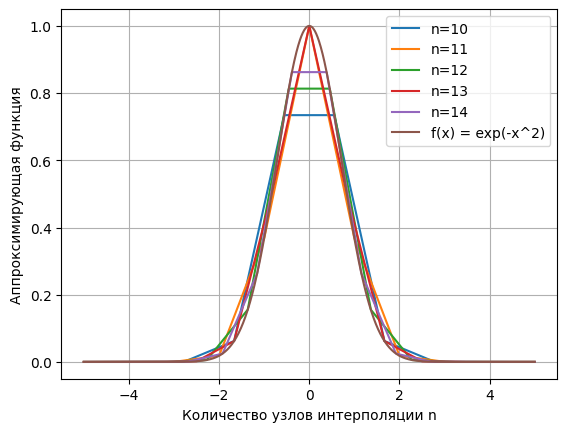

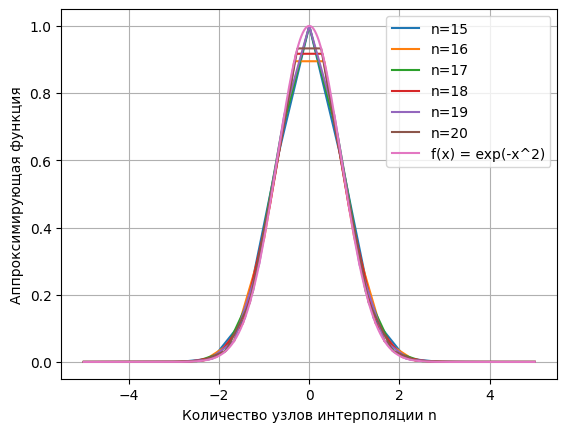

In [136]:
n_range = range(4,10)
for n in n_range:
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = [f(x) for x in x_nodes]

    x_values = np.linspace(-5, 5, 1000)
    y_values = [f(x) for x in x_values]
    y_pli = [piecewise_linear_interpolation(x, x_nodes, y_nodes) for x in x_values]

    plt.plot(x_values, y_pli, label=f'n={n}')

plt.plot(x_vals, y_vals, label='f(x) = exp(-x^2)')
plt.xlabel('Количество узлов интерполяции n')
plt.ylabel('Аппроксимирующая функция')
plt.grid()
plt.legend()
plt.show()

n_range = range(10,15)
for n in n_range:
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = [f(x) for x in x_nodes]

    x_values = np.linspace(-5, 5, 1000)
    y_values = [f(x) for x in x_values]
    y_pli = [piecewise_linear_interpolation(x, x_nodes, y_nodes) for x in x_values]

    plt.plot(x_values, y_pli, label=f'n={n}')

plt.plot(x_vals, y_vals, label='f(x) = exp(-x^2)')
plt.xlabel('Количество узлов интерполяции n')
plt.ylabel('Аппроксимирующая функция')
plt.grid()
plt.legend()
plt.show()

n_range = range(15,21)
for n in n_range:
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = [f(x) for x in x_nodes]

    x_values = np.linspace(-5, 5, 1000)
    y_values = [f(x) for x in x_values]
    y_pli = [piecewise_linear_interpolation(x, x_nodes, y_nodes) for x in x_values]

    plt.plot(x_values, y_pli, label=f'n={n}')

plt.plot(x_vals, y_vals, label='f(x) = exp(-x^2)')
plt.xlabel('Количество узлов интерполяции n')
plt.ylabel('Аппроксимирующая функция')
plt.legend()
plt.grid()
plt.show()


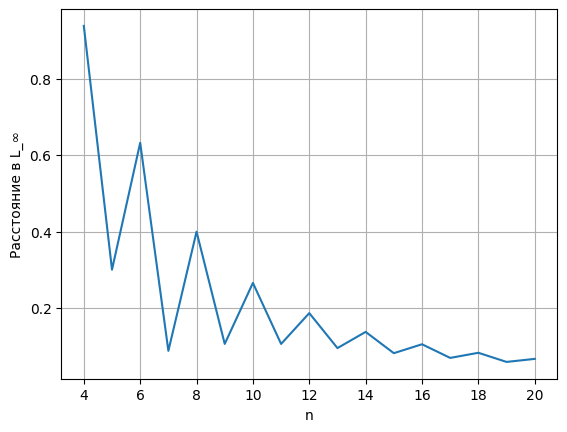

In [131]:
distances = []
n_values = range(4, 21)
for n in n_values:
    x_nodes = np.linspace(-5, 5, n)
    y_nodes = [f(x) for x in x_nodes]

    x_values = np.linspace(-5, 5, 1000)
    y_values = np.array([f(x) for x in x_values])
    y_pli = np.array([piecewise_linear_interpolation(x, x_nodes, y_nodes) for x in x_values])

    distances.append(np.max(np.abs(y_values - y_pli)))

plt.plot(n_values, distances)
plt.xlabel('n')
plt.ylabel('Расстояние в L_∞')
plt.grid()
plt.show()

# Продвинутая часть

# 7


In [73]:
from scipy.special import erf

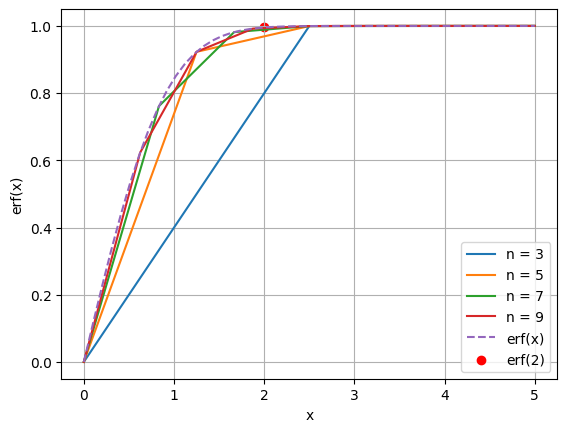

In [133]:
x = 2
a = 0
b = 5
n_values = [3, 5, 7, 9]

res = []

for n in n_values:
    # Узлы интерполяции
    x_nodes = np.linspace(a, b, n)
    y_nodes = erf(x_nodes)

    pli_value = piecewise_linear_interpolation(x, x_nodes, y_nodes)
    res.append(pli_value)


    y_pli = [piecewise_linear_interpolation(x, x_nodes, y_nodes) for x in x_nodes]
    plt.plot(x_nodes, y_pli, label=f"n = {n}")


exact_value = erf(x)

x_values = np.linspace(0, 5, 50)
y_values = erf(x_values)
plt.plot(x_values, y_values, linestyle='dashed', label="erf(x)",)


plt.scatter([x], [exact_value], color="red", label="erf(2)")
# plt.title("Кусочно-линейная интерполяция erf(x)")
plt.xlabel("x")
plt.ylabel("erf(x)")
plt.legend()
plt.grid()
plt.show()